In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import rmsprop
from keras.losses import binary_crossentropy,mean_squared_error

Using TensorFlow backend.
/home/george/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/george/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/george/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/george/anaconda3/lib/python3.7/site-packages/tenso

In [49]:
model = Sequential([
    Dense(1,input_shape=(1,), activation='relu'),
#     Dense(40,activation='relu'),
#     Dense(40,activation='relu'),
    Dense(2,activation='relu'),
    Dense(1,activation='softmax')
    
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# inptdata = XOR GATE
# [1,0]->1
# [0,1]->1
# [1,1]->0
# [0,0]->0

In [76]:
trainData = np.array([[1,0],[0,1],[0,0]])
trainLabel = np.array([[0,1],[0,1],[0,0]])

In [62]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledTrainingData = scaler.fit_transform(trainData).reshape(-1,1)
# scaledLabel = scaler.fit_transform(trainLabel)
scaledTrainingData
# scaledLabel

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [106]:
model.compile('rmsprop',loss='mean_squared_error', metrics=['accuracy'])

In [111]:
prediction = model.fit(scaledTrainingData.reshape(-1,1),trainLabel.reshape(-1,1), epochs=2, batch_size=1)

Epoch 1/2
6/6 [==============================] - 0s 14ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 2/2
6/6 [==============================] - 0s 10ms/step - loss: 0.6667 - accuracy: 0.3333


In [112]:
pred = model.predict_classes(np.array([1,1]).reshape(2,1))
# model.
pred

array([[1],
       [1]], dtype=int32)

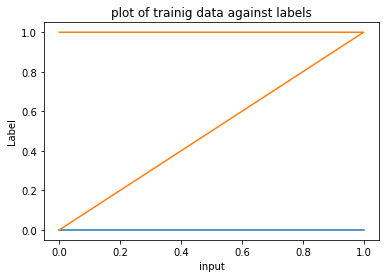

In [118]:
import matplotlib.pyplot as plt
p = plt.plot(make='scatter', _y='pred', x_='input', title='pred vs input xor')
plt.plot(trainData,trainLabel)
plt.title('plot of trainig data against labels')
plt.ylabel('Label')
plt.xlabel('input')
plt.show()